In [12]:
import os
import numpy as np
import pandas as pd
# from functools import lru_cache

## Read Data

In [10]:
products = pd.read_csv('products_train.csv')
products.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [11]:
train = pd.read_csv('sessions_train.csv')
train.head()

,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE


In [12]:
test = pd.read_csv('sessions_test_task1.csv')
test.head()

,prev_items,locale
0,['B08V12CT4C' 'B08V1KXBQD' 'B01BVG1XJS' 'B09VC...,DE
1,['B00R9R5ND6' 'B00R9RZ9ZS' 'B00R9RZ9ZS'],DE
2,['B07YSRXJD3' 'B07G7Q5N6G' 'B08C9Q7QVK' 'B07G7...,DE
3,['B08KQBYV43' '3955350843' '3955350843' '39553...,DE
4,['B09FPTCWMC' 'B09FPTQP68' 'B08HMRY8NG' 'B08TB...,DE


## Preprocessing

In [13]:
def preprocessing(products, train, mylocale:str):
    products_subset = products[products['locale'] == mylocale].reset_index(drop=True)
    train_subset = train[train['locale'] == mylocale].reset_index(drop=True)
    products_subset = products_subset.drop(columns = ['locale'])
    train_subset = train_subset.drop(columns = ['locale'])
    # check missing values
    print(products_subset.isna().sum()/len(products_subset))
    print('##################################')
    print(train_subset.isna().sum()/len(train_subset))
    print('##################################')
    # check duplicates
    print("id duplicates: {}".format(products_subset.id.duplicated().sum()))
    print('##################################')
    # fillna ##TODO:
    products_subset = products_subset.fillna('')
    # check text length
    print("max_length of title: {}, desc: {}".format(max([len(i.split()) for i in products_subset.title]), max([len(i.split()) for i in products_subset.desc])))
    print('##################################')
    import re
    prev_items_list = list(train_subset.prev_items)
    prev_items_list_new = [re.sub('[^0-9A-Z ]+', '', items).split() for items in prev_items_list]
    train_subset['prev_items'] = prev_items_list_new
    prev_items_list_new_len = [len(prev_items) for prev_items in prev_items_list_new]
    print("max, min, avg, median of prev_items: {}, {}, {}, {}".format(max(prev_items_list_new_len), min(prev_items_list_new_len), np.mean(prev_items_list_new_len), np.median(prev_items_list_new_len)))
    return products_subset, train_subset

In [14]:
products.locale.unique()

array(['DE', 'JP', 'UK', 'ES', 'FR', 'IT'], dtype=object)

In [15]:
products_de, train_de = preprocessing(products, train, mylocale='DE')

id          0.000000
title       0.000000
price       0.000000
brand       0.018143
color       0.244751
size        0.423134
model       0.509640
material    0.428679
author      0.951936
desc        0.074713
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 81, desc: 172
##################################
max, min, avg, median of prev_items: 156, 2, 4.35209048637054, 3.0


In [19]:
products_jp, train_jp = preprocessing(products, train, mylocale='JP')

id          0.000000
title       0.000020
price       0.000000
brand       0.013769
color       0.359675
size        0.408431
model       0.562810
material    0.554311
author      0.936895
desc        0.106739
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 106, desc: 223
##################################
max, min, avg, median of prev_items: 474, 2, 4.48238671703848, 3.0


In [20]:
products_uk, train_uk = preprocessing(products, train, mylocale='UK')

id          0.000000
title       0.000000
price       0.000000
brand       0.008557
color       0.244112
size        0.398033
model       0.513117
material    0.402305
author      0.962222
desc        0.078488
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 107, desc: 195
##################################
max, min, avg, median of prev_items: 201, 2, 4.121624353631128, 3.0


In [21]:
products_uk.head()

,id,title,price,brand,color,size,model,material,author,desc
0,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,,100% Polyester,,COLOR: The sherpa throw blanket is available i...
1,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,,Competitively priced
2,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,,,,"Scarbrough, Mark",
3,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,,FBA-sealer-black,Acrylonitrile Butadiene Styrene,,【AFTER-SALE】This handheld food heat sealer sho...
4,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,,,Alloy Steel,,🔐【 Anti-Friction & Customer First】Each box of ...


In [22]:
products_uk.title[0]

'SOCHOW Sherpa Fleece Throw Blanket, Double-Sided Super Soft Luxurious Plush Blanket 127cm×150cm, Teal Green'

In [23]:
def combine_features(products_subset):
    new = []
    for i in range(len(products_subset)):
        a = ''
        if products_subset['title'][i]!='':
            if products_subset['brand'][i] in products_subset['title'][i]:
                a = products_subset['title'][i]
            else:
                a = products_subset['brand'][i] + ' ' + products_subset['title'][i]

            if products_subset['color'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['color'][i]
            
            if products_subset['size'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['size'][i]
                
            if products_subset['model'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['model'][i]
        new.append(a)
    products_subset['new_feature'] = new
    products_subset = products_subset[['id', 'price', 'new_feature', 'desc']]
    return products_subset

In [24]:
products_subset = combine_features(products_uk)

In [25]:
products_subset['new_feature_len'] = [len(i.split()) for i in products_subset.new_feature]
products_subset['desc_len'] = [len(i.split()) for i in products_subset.desc]

/tmp/ipykernel_593/462355804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_subset['new_feature_len'] = [len(i.split()) for i in products_subset.new_feature]
/tmp/ipykernel_593/462355804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_subset['desc_len'] = [len(i.split()) for i in products_subset.desc]


<AxesSubplot:>

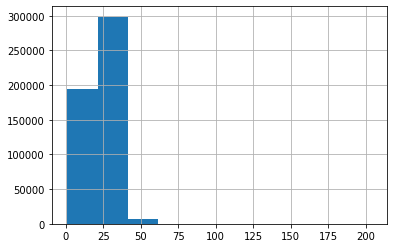

In [26]:
products_subset['new_feature_len'].hist()

In [27]:
np.percentile(products_subset['new_feature_len'], 95)

37.0

<AxesSubplot:>

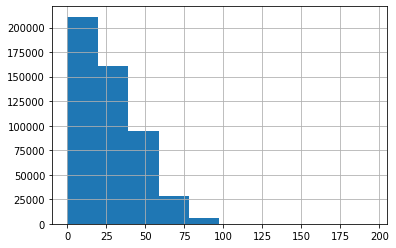

In [28]:
products_subset['desc_len'].hist()

In [29]:
np.percentile(products_subset['desc_len'], 95)

63.0

In [ ]:
# for idx in range(len(products_subset)):
#     if products_subset['desc'][idx]=='':
#         print(idx)

In [ ]:
# products_subset.isna().sum()

In [ ]:
!pip install -U sentence-transformers

In [29]:
# def clean_text(text):
#     # Remove special characters and digits
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     # Convert to lowercase
#     text = text.lower()
#     # Remove extra whitespaces
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

In [83]:
# def clean_german_text(text):
#     # Remove URLs
#     text = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+', '', text)
#     # Remove special characters and digits
#     text = re.sub(r'[^a-zA-ZäöüÄÖÜß\s]', '', text)
#     # Convert to lowercase
#     text = text.lower()
#     # Remove extra whitespaces
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text


In [25]:
# !pip install mojimoji
# import mojimoji

# def clean_japanese_text(text):
#     # Convert to full-width characters
#     text = mojimoji.zen_to_han(text, kana=False)
#     # Remove URLs
#     text = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+', '', text)
#     # Remove special characters and digits
#     text = re.sub(r'[^\u3040-\u30ff\u3400-\u4dbf\u4e00-\u9fff\uff66-\uff9f\s]', '', text)
#     # Remove extra whitespaces
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("sentence-transformers/distiluse-base-multilingual-cased-v2")

In [ ]:
new_features = list(products_subset.new_feature)
new_features_embeddings = model.encode(new_features, show_progress_bar = True)

In [32]:
df = pd.DataFrame(new_features_embeddings, 
                  columns = ['new_dim{}'.format(i) for i in range(1, new_features_embeddings.shape[1]+1)], 
                  index = products_subset.id)
df.to_csv('new_feature_embedding.csv')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_features_embeddings_ss = scaler.fit_transform(new_features_embeddings)

In [34]:
df = pd.DataFrame(new_features_embeddings_ss, 
                  columns = ['new_ss_dim{}'.format(i) for i in range(1, new_features_embeddings_ss.shape[1]+1)], 
                  index = products_subset.id)
df.to_csv('new_feature_embedding_ss.csv')

In [35]:
df1 = products_subset[products_subset['desc'] != '']
df2 = products_subset[products_subset['desc'] == '']

In [36]:
descs = list(df1.desc)
descs_embeddings = model.encode(descs, show_progress_bar = True)
descs_embeddings_ss = scaler.fit_transform(descs_embeddings)

Batches: 100%|███████████████████████████| 14404/14404 [02:18<00:00, 103.83it/s]


In [37]:
df11 = pd.DataFrame(descs_embeddings, 
                    columns = ['desc_dim{}'.format(i) for i in range(1, descs_embeddings.shape[1]+1)], 
                    index = df1.id)
df22 = pd.DataFrame(columns = ['desc_dim{}'.format(i) for i in range(1, descs_embeddings.shape[1]+1)], 
                    index = df2.id)
df = pd.concat([df11, df22])
df = df.fillna(value = dict(zip(['desc_dim{}'.format(i) for i in range(1, descs_embeddings.shape[1]+1)], 
         descs_embeddings.mean(axis=0).tolist())))
df.to_csv('desc_embedding.csv')

In [38]:
df11 = pd.DataFrame(descs_embeddings_ss, 
                    columns = ['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
                    index = df1.id)
df22 = pd.DataFrame(columns = ['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
                    index = df2.id)
df = pd.concat([df11, df22])
df = df.fillna(value = dict(zip(['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
         descs_embeddings_ss.mean(axis=0).tolist())))
df.to_csv('desc_embedding_ss.csv')

In [17]:
df_new_ss = pd.read_csv('new_feature_embedding_ss.csv', index_col='id')
df_desc_ss = pd.read_csv('desc_embedding_ss.csv', index_col='id')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = products_subset[['id', 'price']]
df['prices_ss'] = scaler.fit_transform(df.price.values.reshape(-1, 1))
df = df.drop(columns=['price'])
df = df.set_index('id', drop=True)
df = df.merge(df_new_ss, how='left', left_index=True, right_index=True)
df = df.merge(df_desc_ss, how='left', left_index=True, right_index=True)

/tmp/ipykernel_593/2593745433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices_ss'] = scaler.fit_transform(df.price.values.reshape(-1, 1))


In [31]:
df.head()

,prices_ss,new_ss_dim1,new_ss_dim2,new_ss_dim3,new_ss_dim4,new_ss_dim5,new_ss_dim6,new_ss_dim7,new_ss_dim8,new_ss_dim9,...,desc_ss_dim503,desc_ss_dim504,desc_ss_dim505,desc_ss_dim506,desc_ss_dim507,desc_ss_dim508,desc_ss_dim509,desc_ss_dim510,desc_ss_dim511,desc_ss_dim512
id,,,,,,,,,,,,,,,,,,,,,
B087LZNPHS,-0.230721,1.087279,-0.416166,-0.718010,-0.930434,0.822901,-0.327604,0.371388,1.189846,-1.626109,...,-1.893020e+00,-7.141520e-01,-1.833597e+00,2.191096e-01,-4.029134e-01,8.893926e-01,-2.559814e-01,-4.375614e-01,-3.106822e-01,1.105723e-01
B08THFN1KX,-0.230723,-0.023626,1.765893,-0.412942,-0.343070,0.293586,-1.264785,-0.452596,0.484568,-0.236840,...,-7.489761e-02,2.831600e-01,4.121368e-01,1.344810e+00,-1.392480e+00,-1.439571e+00,-5.570378e-01,-1.272577e+00,-9.531024e-01,6.828422e-01
0804185328,-0.230722,0.844859,-0.310522,0.959111,0.402326,0.211465,-0.799104,-2.379631,0.722233,0.112258,...,6.687098e-09,-7.083549e-09,-9.345935e-09,2.789478e-09,-3.819998e-09,1.533275e-08,1.434892e-09,7.956174e-10,-4.070354e-09,5.150331e-08
B09VBKDBW6,-0.230722,-0.432726,-0.251907,0.616051,-1.063654,0.452549,-0.818142,-0.547106,-0.102152,0.738108,...,-3.005795e-01,-8.516874e-01,-1.853899e-01,-1.569515e+00,7.732100e-01,2.095119e+00,1.394694e-01,-8.994385e-01,-1.591232e-02,1.457756e+00
B096ZW8B49,-0.230721,0.483580,-1.799943,-0.524985,0.345448,2.369826,-1.413009,0.016605,0.494155,0.958550,...,5.797981e-01,-1.131419e+00,-8.763151e-01,-3.036862e+00,-5.086034e-01,1.738768e+00,-7.260640e-01,1.761866e-01,8.648665e-01,-1.520686e+00


## Dimension Reduction

In [32]:
combined_embeddings = np.column_stack([df[i].values for i in df.columns])

### UMAP

In [4]:
# ! pip install umap-learn

In [5]:
# # import umap
# # import umap.cuda
# import umap.umap_ as umap
# import time
# start=time.time()
# # Initialize UMAP transformer
# umap_transformer = umap.UMAP(n_components=2, random_state=42)

# # Fit and transform the data using UMAP
# combined_embeddings_umap = umap_transformer.fit_transform(combined_embeddings)
# print("{} seconds".format(time.time()-start))


In [6]:
# Print the shape of the transformed data
# print(combined_embeddings_umap.shape)

### TSNE

In [3]:
# from sklearn.manifold import TSNE
# import time
# start=time.time()
# # Use t-SNE to reduce the dimensionality of the embeddings to 2D
# tsne = TSNE(n_components=2, perplexity=250000, learning_rate=200)
# embeddings_2d = tsne.fit_transform(combined_embeddings)
# print("{} seconds".format(time.time()-start))
# # Plot the embeddings in 2D
# plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=10, alpha=0.5)
# plt.show()

### Check Correlation between Embeddings

In [136]:
# !pip install seaborn

In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the embeddings from a file
# embeddings = new_features_embeddings

# # Compute the correlation matrix
# corr_matrix = np.corrcoef(embeddings.T)

# # Plot the correlation matrix as a heatmap
# sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
# plt.show()


In [28]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the embeddings from a file
# embeddings = descs_embeddings

# # Compute the correlation matrix
# corr_matrix = np.corrcoef(embeddings.T)

# # Plot the correlation matrix as a heatmap
# sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
# plt.show()


In [170]:
# combined_embeddings = [np.concatenate([titles_embeddings[i], descs_embeddings[i]]) for i in range(len(products_subset))]

In [ ]:
# titles = list(products_subset.dropna().title)[:100]
# descs = list(products_subset.dropna().desc)[:100]
# titles_embeddings = model.encode(titles, show_progress_bar = True)
# descs_embeddings = model.encode(descs, show_progress_bar = True)
# combined_embeddings = [np.concatenate([titles_embeddings[i], descs_embeddings[i]]) for i in range(len(products_subset.dropna()[:100]))]

### PCA

439


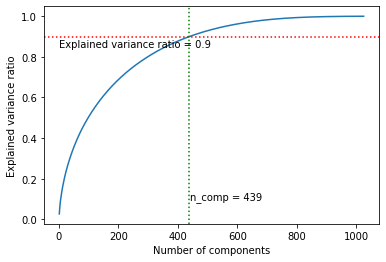

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# combined_embeddings_ss = scaler.fit_transform(combined_embeddings)

pca = PCA()

pca.fit(combined_embeddings)

# Plot explained variance ratio
threshold = 0.9
cumsum = np.cumsum(pca.explained_variance_ratio_)
idx = np.where(cumsum >= threshold)[0][0]
print(idx+1)
plt.plot([i for i in range(1, len(cumsum)+1)], cumsum)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.axhline(y=threshold, color='r', linestyle=':')
plt.axvline(x=idx+1, color='green', linestyle=':')\
# , label = 'axhline - % of Explained variance ratio = 0.9'
# , label = 'axvline - % of Number of components = {}'.format(idx+1)
# plt.legend(loc = 'best')
plt.annotate('n_comp = {}'.format(idx+1), (idx+1+1, 0.1))
plt.annotate('Explained variance ratio = {}'.format(threshold), (0, threshold-0.05))
plt.show()

In [34]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=448)

# Fit and transform data using PCA
combined_embeddings_pca = pca.fit_transform(combined_embeddings)

# Print transformed data
# print(combined_embeddings_pca)


In [35]:
combined_embeddings_pca[0].shape

(448,)

In [36]:
products_final = pd.DataFrame(combined_embeddings_pca, 
                  columns = ['combined_embedding_pca{}'.format(i) for i in range(1, combined_embeddings_pca.shape[1]+1)], 
                  index = df.index)

In [58]:
# products_final = pd.DataFrame({'id': df.index, 'combined_embeddings_pca': list(combined_embeddings_pca)})

In [37]:
products_final.head()

,combined_embedding_pca1,combined_embedding_pca2,combined_embedding_pca3,combined_embedding_pca4,combined_embedding_pca5,combined_embedding_pca6,combined_embedding_pca7,combined_embedding_pca8,combined_embedding_pca9,combined_embedding_pca10,...,combined_embedding_pca439,combined_embedding_pca440,combined_embedding_pca441,combined_embedding_pca442,combined_embedding_pca443,combined_embedding_pca444,combined_embedding_pca445,combined_embedding_pca446,combined_embedding_pca447,combined_embedding_pca448
id,,,,,,,,,,,,,,,,,,,,,
B087LZNPHS,-3.710657,-1.025128,1.805948,8.349989,0.311934,1.227259,-3.868785,2.047173,-5.797869,6.070874,...,0.424794,0.341798,0.600077,-0.216559,-0.511859,0.217452,-0.066185,0.357458,-0.579394,-0.594661
B08THFN1KX,3.531190,-0.287151,-4.571441,0.414779,2.042000,0.286359,-0.929373,-0.463381,-0.386577,4.253672,...,-1.009967,-0.634185,0.940984,0.054958,0.304294,0.699249,-0.502013,0.763561,-0.768937,-1.104195
0804185328,2.479328,1.451877,-0.109254,0.437393,-0.039164,-6.535440,-0.720898,-1.553755,-1.449575,-4.095729,...,-0.710188,0.126532,0.230423,-0.372012,-1.295168,-0.401958,-1.770361,-0.023480,-0.248909,-0.693370
B09VBKDBW6,-5.301765,-4.888180,1.616947,-0.671736,2.018994,3.659828,7.652908,0.811162,-0.881547,-5.959518,...,0.501530,-0.119176,0.316466,0.297322,0.474023,-1.128171,-0.519731,0.383672,-0.373704,0.455682
B096ZW8B49,-3.772524,-4.362319,-0.230184,1.384461,-3.692871,0.893444,3.595063,-2.083135,3.089667,-2.741810,...,0.370696,-0.768178,0.729494,0.638619,0.950931,1.466153,0.094654,0.578400,-0.107099,-0.077613


In [38]:
products_final.to_csv('products_final.csv')

In [ ]:
# products_subset_toy = products_subset.dropna()[:100]
# products_subset_toy['combined_embeddings_pca'] = list(combined_embeddings_pca)
# products_final = products_subset_toy[['id', 'combined_embeddings_pca']]

## extract 3 most recent items

In [39]:
train_subset = train_uk

In [40]:
train_subset['prev_item1'] = [i[-1] if len(i)>0 else '' for i in train_subset.prev_items]
train_subset['prev_item2'] = [i[-2] if len(i)>1 else '' for i in train_subset.prev_items]
train_subset['prev_item3'] = [i[-3] if len(i)>2 else '' for i in train_subset.prev_items]

In [41]:
train_subset.head()

,prev_items,next_item,prev_item1,prev_item2,prev_item3
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,B07Y21LDJX,B07J4WF8VH,B0BFDR9X13
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,B07GZW3P4W,B07FM2GLNQ,
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,B07DDL77RY,B07DDL77RY,B0021L95HU
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,B000I8XZ7O,B0B2WSZYL2,
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,B09HLDN8W1,B00OI6NQUI,B00LW1APOC


In [42]:
train_subset.to_csv('train_uk.csv', index=0)

In [237]:
train_final = train_subset.drop(columns = ['prev_items'])
# train_final = train_subset
for col in train_final.columns:
    train_final = train_final.merge(products_final, left_on = col, right_on = 'id', how = 'left')
    train_final = train_final.drop(columns = ['id'])
    train_final = train_final.rename(columns={'combined_embeddings_pca':col+'_feature'})

In [238]:
train_final.head()

,next_item,prev_item1,prev_item2,prev_item3,next_item_feature,prev_item1_feature,prev_item2_feature,prev_item3_feature
0,B07Y227WNJ,B07Y21LDJX,B07J4WF8VH,B0BFDR9X13,"[-4.480393630382924, -1.7827786491056967, 5.98...","[-4.586360919488772, -1.7626063078478023, 5.74...","[-1.4244441129542327, -1.2998737596209582, 2.8...","[-5.11575413696181, -1.8022727265046778, 5.863..."
1,B095NNZCR6,B07GZW3P4W,B07FM2GLNQ,,"[-3.8421575865522417, -2.724876761028671, -0.1...","[5.520881035438967, -2.313779606430918, -5.508...","[-2.9330213255589297, -3.3612567906063777, -5....",NaN
2,B002KA1FZC,B07DDL77RY,B07DDL77RY,B0021L95HU,"[8.965158380848735, -1.2593165042049623, 5.784...","[6.537119428938243, -1.6863158827836977, 5.590...","[6.537119428938243, -1.6863158827836977, 5.590...","[5.666940441005077, -3.077251155484389, 2.9045..."
3,B000I90TAO,B000I8XZ7O,B0B2WSZYL2,,"[7.926058567385448, 5.40155865521846, -6.15666...","[4.960003882504724, 9.939662685633568, -4.6240...","[-0.6554075653573288, -1.3186090232981256, 0.2...",NaN
4,B07H54NZ3K,B09HLDN8W1,B00OI6NQUI,B00LW1APOC,"[-1.6064399708537727, -2.6973371814030433, -0....","[-5.286453483647417, -0.37421418194630696, 2.9...","[-4.226084769187801, -3.948964598713698, -0.42...","[-4.5383134025562075, -5.08126088772494, 0.423..."


In [239]:
train_final.isna().sum()/len(train_final)

next_item             0.000000
prev_item1            0.000000
prev_item2            0.000000
prev_item3            0.000000
next_item_feature     0.000000
prev_item1_feature    0.000000
prev_item2_feature    0.000000
prev_item3_feature    0.380077
dtype: float64

In [ ]:
train_final.to_csv('train_final.csv', index=0)

In [ ]:
# def cosine_similarity(A, B):
#     '''
#     Input:
#         A: a numpy array which corresponds to a word vector
#         B: A numpy array which corresponds to a word vector
#     Output:
#         cos: numerical number representing the cosine similarity between A and B.
#     '''

#     dot = np.dot(A,B)
#     norma = np.sqrt(np.dot(A,A))
#     normb = np.sqrt(np.dot(B,B))
#     cos = dot/(norma*normb)

#     return cos

In [1]:
#cosine_similarity(titles_embeddings[0], brands_embeddings[0])

In [ ]:
# brands = products_subset.brand
# titles = products_subset.title
# colors = products_subset.color
# def is_almost_subset(str1, str2, threshold):
#     """
#     Check if str1 is almost a subset of str2 using Jaccard similarity
#     with a given threshold.
#     """
#     if str1 is None or str2 is None:
#         return False
#     set1 = set(str1.lower().split())
#     set2 = set(str2.lower().split())
#     sim = len(set1.intersection(set2)) / len(set1)
#     if sim >= threshold:
#         return True
#     else:
#         return False


# count = 0
# a=0
# for i in range(len(products_subset)):
#   if brands[i]!='' and titles[i]!='':
#     if is_almost_subset(brands[i],titles[i], 0.5):
#       count+=1
# print(count)

In [ ]:
# brands = products_subset.brand
# titles = products_subset.title
# sizes = products_subset['size']
# def is_almost_subset(str1, str2, threshold):
#     """
#     Check if str1 is almost a subset of str2 using Jaccard similarity
#     with a given threshold.
#     """
#     if str1 is None or str2 is None:
#         return False
#     set1 = set(str1.lower().split())
#     set2 = set(str2.lower().split())
#     sim = len(set1.intersection(set2)) / len(set1)
#     if sim >= threshold:
#         return True
#     else:
#         return False


# count = 0
# for i in range(len(products_subset)):
#   # print(i)
#   if sizes[i]!='' and titles[i]!='':
#     if is_almost_subset(sizes[i],titles[i], 0.5):
#       count+=1
# print(count)

In [ ]:
# a=0
# for i in range(len(products_subset)):
#   if colors[i]!='' and titles[i]!='':
#     if is_almost_subset(colors[i],titles[i], 0.5):
#       a+=1

# print(a)

In [ ]:
# brands = products_subset.brand
# titles = products_subset.title

# count = 0
# for i in range(len(products_subset)):
#   if sizes[i] in titles[i]:
#       count+=1
# print(count)